# Overview  of Problem Statement
- Business:
    - Lending Club is p2p lending company which specialises in lending various types of loans to urban customer based in the United States. 
- Problem statement:
    - The company receives a loan application, then has to make a  decision for loan approval based on the applicant's profile.
    - 2 types of risks associated with the company decision:
        - **loss of business** if the company reject the applicant whose likely to repay the loan
        - **financial loss** if the company approve the applicant whose not likely to repay the loan (default) -> this is the main prevention
- Objective:
    - Since **financial loss** giving the highest impact for the company, It is required for the business to know prior which applicant is likely to default by understanding the patterns (driving factors) behind loan default. By using those variables and the selected model, they could consider either to approve / reject the loan application 
    
    
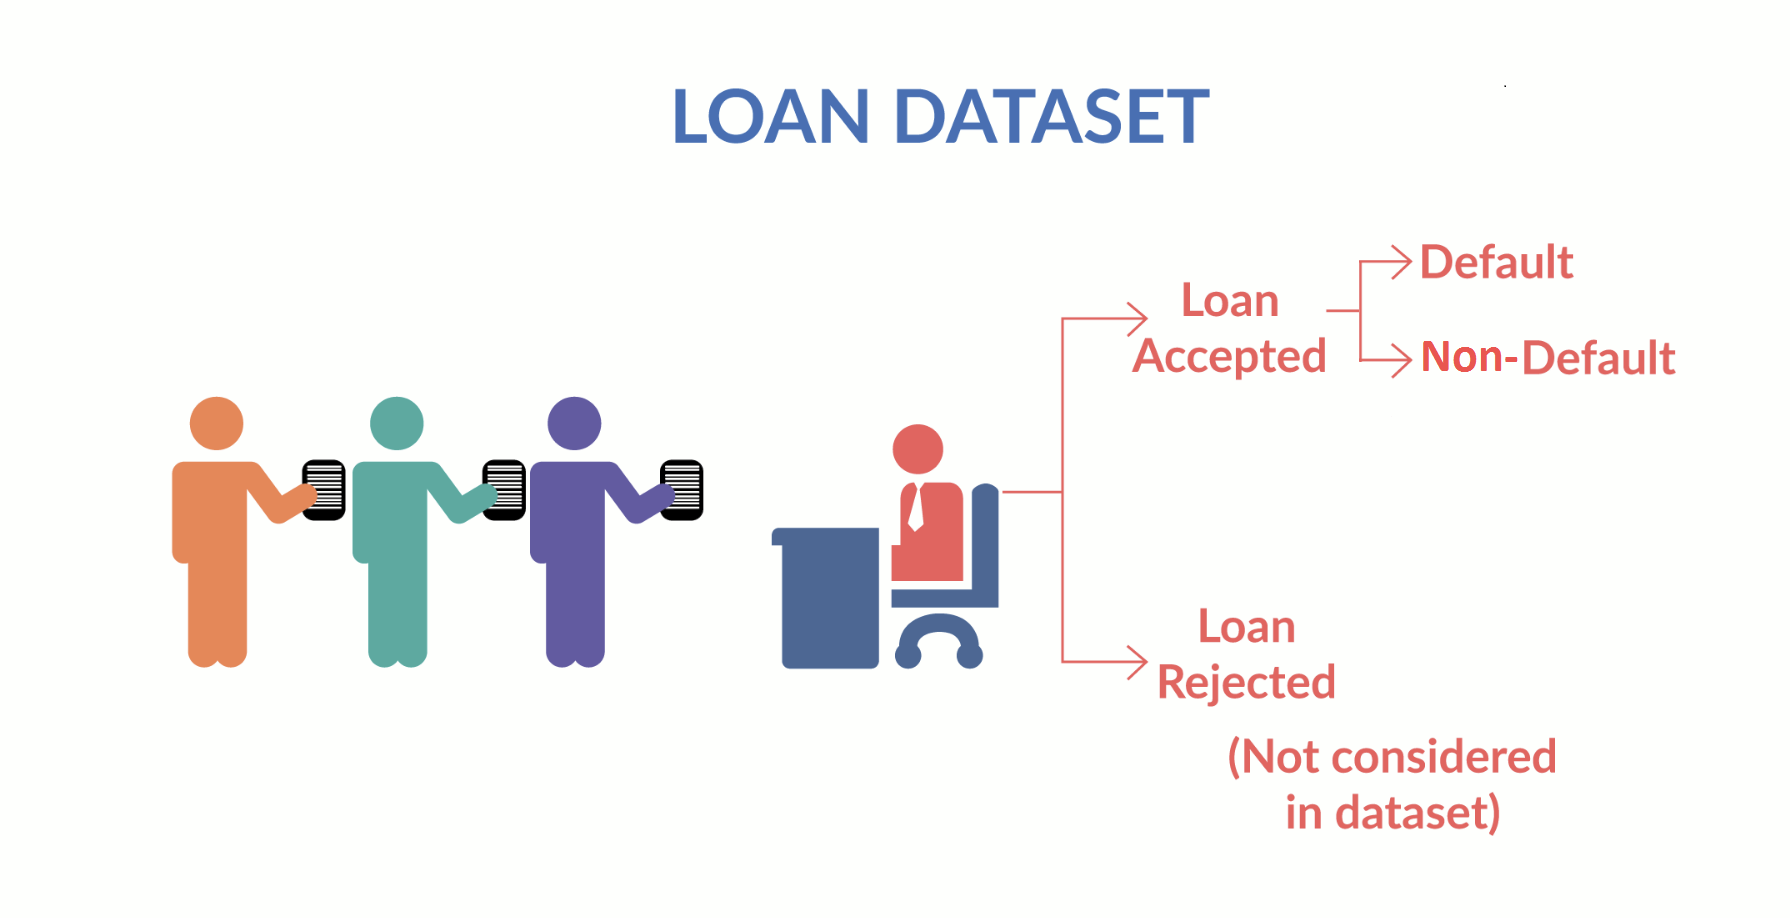 _Figure Source : [Lending Club Case Study](https://www.kaggle.com/code/abhishek14398/lending-club-case-study)_

# Main Study
- Exploring the loans data 
- Modelling the possibility of future default loans 

# Scope of Study
In this study we only explore the loan data and the modelling for predicting future applicant whose likely to default or not. So in this case, we are limiting our exploration to related features and modelling to only  **binary classification Machine Learning** models

# Dataset
Dataset used in this case study is retrieved from [Kaggle Lending Club Dataset](https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans) and dictionary file is retrieved from [dataset dictionary](https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction/data?select=LCDataDictionary.xlsx)

The data file contain complete loan data for all loans issued through the 2016-2017 from a P2P company called **Lending Club**. The data includes the applicant profile, current loan status (Current, Late, Fully Paid, etc.) and latest payment information. The file containing loan data through the "present" contains complete loan data for all loans issued through the previous completed calendar quarter. Additional features include credit scores, number of finance inquiries, address including zip codes, and state, and collections among others. The file is a matrix of roughly 700 thousand observations and 72 variables.

# Section Summaries
1. Import Libraries
2. Load Data
3. Check Data Structure
4. Identify and Handle Missing Values
5. Clean and Format Data
6. Explore Data
7. Preparation for Modelling
8. Modelling

## 1. Import Libraries

In [642]:
#Importing libraries required for the case study and to plot charts
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas 

from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [474]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'LCDataDictionary.xlsx',
 'lc_2016_2017.csv',
 'Loan Default Case Study - From Exploration to Model Prediction.ipynb']

In [475]:
print(pd.__version__)

1.3.5


## 2. Load Data
Read loan data from csv

In [476]:
lc_loan = pd.read_csv('lc_2016_2017.csv')

In [477]:
print("Shape of the data frame :",lc_loan.shape)


Shape of the data frame : (759338, 72)


In [478]:
print("===================================================")
print("Information about the data frame :",lc_loan.info())
print("===================================================")
print("The data types of columns of data frame",lc_loan.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

## 3. Check Data Structure
Export the data dictionary and then determine the target variable i.e. the one that describes the status of the loan and possible feature variables (driving factors)

In [479]:
lc_dict = pd.read_excel('LCDataDictionary.xlsx')
pd.set_option("display.max_rows", None)

In [480]:
lc_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


### Target Variable
Based on the data dictionary, the target variable (the current loan status) is potrayed in ```loan_status``` column

In [481]:
# get loan status unique values
lc_loan['loan_status'].value_counts()

Current               565523
Fully Paid            130718
Charged Off            37197
Late (31-120 days)     15354
In Grace Period         6634
Late (16-30 days)       3876
Default                   36
Name: loan_status, dtype: int64

Here we can focus our data on either **Fully Paid** and **Charged Off** since our model is binary classification case. Those, The remaining categories of ```loan status``` are drop because of this consideration:
- we dont know whether the ```Current``` will be ```Charged Off```, ```Fully Paid```, or ```Default```
- ```Default``` are less compare to ```Fully Paid``` or ```Charged Off```

In [482]:
lc_loan = lc_loan[lc_loan['loan_status'].isin(['Fully Paid', 'Charged Off'])]
lc_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
8,112038251,NaN,11575,11575,11575.0,36 months,7.35,359.26,A,A4,...,92315.0,63.0,2.0,8.0,1581.0,36.0,37600.0,1.0,6.0,2.0
10,112149045,NaN,7200,7200,7200.0,36 months,24.85,285.70,E,E3,...,2028.0,51.0,0.0,1.0,2779.0,74.0,3600.0,0.0,0.0,0.0
24,112052261,NaN,7500,7500,7500.0,36 months,7.35,232.79,A,A4,...,22607.0,70.0,1.0,6.0,5965.0,39.0,85700.0,6.0,8.0,6.0
42,111999259,NaN,10000,10000,10000.0,60 months,16.02,243.29,C,C5,...,5223.0,95.0,2.0,5.0,3898.0,32.0,28700.0,0.0,0.0,0.0
91,111808508,NaN,14000,14000,14000.0,36 months,16.02,492.34,C,C5,...,24984.0,82.0,2.0,3.0,2700.0,83.0,3000.0,3.0,0.0,4.0


### Feature Variables

There are so many variables that provided from the dataset. Broadly, those variables are grouped into three types of features:

- Applicant profile (employment details, income etc.)
- Loan characteristics (amount of loan, interest rate, purpose of loan etc.)
- Applicant behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Because our goal is to modelling the driving factor behind the  indication of applicant whose likely to default, **_we only choose variable that provide initially from the loan application_**. The applicant behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. Furthermore, remove non-informative variable such as ```member_id``` since it doesn't give us any insight _(Source: [Here](https://www.kaggle.com/code/ritavale/eda-case-study-lending-club))_

- ```loan_amnt```: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value
- ```term``` : The number of payments on the loan. Values are in months and can be either 36 or 60
- ```int_rate``` (loan rate) : Interest Rate on the loan 
- ```installment```: The monthly payment owed by the borrower if the loan originates
- ```grade```: LC assigned loan grade
- ```sub_grade```: LC assigned loan subgrade
- ```emp_title```: The job title supplied by the Borrower when applying for the loan
- ```emp_length```: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- ```home_ownership```: The home ownership status provided by the borrower during registration or obtained from the credit report. 
- ```annual_inc``` : The self-reported annual income provided by the borrower during registration
- ```pymnt_plan```: Indicates if a payment plan has been put in place for the loan
- ```desc```: Loan description provided by the borrower
- ```purpose```(loan purpose) : A category provided by the borrower for the loan request.
- ```title```: The loan title provided by the borrower
- ```zip_code```: The first 3 numbers of the zip code provided by the borrower in the loan application.
- ```addr_state```: The state provided by the borrower in the loan application
- ```dti```: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- ```application_type```: Indicates whether the loan is an individual application or a joint application with two co-borrowers
- ```annual_inc_joint```: The combined self-reported annual income provided by the co-borrowers during registration
- ```dti_joint```: A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- ```earliest_cr_line```: The month the borrower's earliest reported credit line was opened
- ```open_acc```: The number of open credit lines in the borrower's credit file
- ```pub_rec```: Number of derogatory public records
- ```revol_bal```: Total credit revolving balance
- ```revol_util```: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- ```total_acc```: The total number of credit lines currently in the borrower's credit file
- ```application_type```: Indicates whether the loan is an individual application or a joint application with two co-borrowers


We can take out the rest of variables in the ```lc_loan``` dataset remaining only above features



In [483]:
final_feats = ['loan_amnt','term', 'int_rate', 'installment',
                    'grade','sub_grade', 'emp_title', 'emp_length',
                    'home_ownership', 'annual_inc', 'pymnt_plan',
                    'desc', 'purpose', 'title', 'zip_code','addr_state',
                    'dti', 'application_type', 'annual_inc_joint',
                    'dti_joint', 'earliest_cr_line', 'open_acc', 'pub_rec',
                    'revol_bal', 'revol_util', 'total_acc',  'application_type', 'loan_status']
lc_loan = lc_loan.drop(columns=[col for col in lc_loan if col not in final_feats])
lc_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,annual_inc_joint,dti_joint
8,11575,36 months,7.35,359.26,A,A4,Solutions Architect,6 years,OWN,153000.0,...,16.99,Jul-1994,20,1,8550.0,22.7,46,Individual,NaN,NaN
10,7200,36 months,24.85,285.70,E,E3,Pse,2 years,RENT,50000.0,...,6.07,Jan-2000,4,0,3560.0,98.9,5,Individual,NaN,NaN
24,7500,36 months,7.35,232.79,A,A4,Associate Director,7 years,MORTGAGE,110000.0,...,13.12,Mar-2013,19,0,23348.0,27.2,27,Individual,NaN,NaN
42,10000,60 months,16.02,243.29,C,C5,Biller,7 years,RENT,51979.0,...,10.11,Aug-2006,15,2,5733.0,20.0,21,Individual,NaN,NaN
91,14000,36 months,16.02,492.34,C,C5,cdl driver,7 years,MORTGAGE,75000.0,...,10.86,May-2008,4,0,2700.0,90.0,10,Individual,NaN,NaN


In [484]:
lc_loan['loan_status'].value_counts()

Fully Paid     130718
Charged Off     37197
Name: loan_status, dtype: int64

## 4. Identify and Handle Missing Value
The strategy: Drop columns having more than 50% missing values (```NaN```) of total data 


In [485]:
# check missing values
missing_values = pd.DataFrame(lc_loan.isnull().sum()/lc_loan.shape[0])
missing_values

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,0.064551
emp_length,0.064015
home_ownership,0.000000
annual_inc,0.000000


In [486]:
# filter missing values for 50% criteria
missing_values = missing_values[missing_values.iloc[:,0] > 0.5]
missing_values.sort_values([0], ascending=False)

,0
desc,0.999958
annual_inc_joint,0.978787
dti_joint,0.978787


In [487]:
# drop features with 50% missing values
lc_loan.dropna(thresh = lc_loan.shape[0]*0.5, how='all', axis=1, inplace=True)

In [488]:
# check again the missing values
missing_values = pd.DataFrame(lc_loan.isnull().sum()/lc_loan.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.5]
missing_values.sort_values([0], ascending=False)

,0


In [489]:
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167915 entries, 8 to 759331
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amnt         167915 non-null  int64  
 1   term              167915 non-null  object 
 2   int_rate          167915 non-null  float64
 3   installment       167915 non-null  float64
 4   grade             167915 non-null  object 
 5   sub_grade         167915 non-null  object 
 6   emp_title         157076 non-null  object 
 7   emp_length        157166 non-null  object 
 8   home_ownership    167915 non-null  object 
 9   annual_inc        167915 non-null  float64
 10  loan_status       167915 non-null  object 
 11  pymnt_plan        167915 non-null  object 
 12  purpose           167915 non-null  object 
 13  title             160077 non-null  object 
 14  zip_code          167915 non-null  object 
 15  addr_state        167915 non-null  object 
 16  dti               16

Now only 23 features remaining (left out ```loan_status```)  which are consists of 10 numeric features and 13 categorical features

## 5. Clean and Format Data
We need to make sure the data type is appropiate for visualization by cleansing or formatting the current data condition. Strategy:
- Break down the variables (features) into categorical and numeric
- Clean and format the data

### Grouping features into categorical and numeric

In [490]:
### Grouping 
categoric_col = []
numeric_col = []
X = lc_loan.drop('loan_status', axis=1) #take out the target variable
for col in X.select_dtypes(include = ['object', 'bool']).columns:
    categoric_col.append(col)
    print(col)
    print(X[col].unique())
    print()

for col in X.select_dtypes(include = ['int', 'float']).columns:
    numeric_col.append(col)
print("===================================================")

print("Categoric Column : ",categoric_col)
print("===================================================")
print("Numeric Column : ",numeric_col)
print("===================================================")


term
['36 months' '60 months']

grade
['A' 'E' 'C' 'G' 'B' 'D' 'F']

sub_grade
['A4' 'E3' 'C5' 'G1' 'B5' 'B4' 'B1' 'B3' 'D5' 'B2' 'C2' 'E2' 'C4' 'A1'
 'E1' 'C3' 'D1' 'G3' 'A3' 'C1' 'A5' 'D3' 'D2' 'E5' 'F3' 'A2' 'D4' 'G2'
 'F2' 'E4' 'G4' 'F4' 'F1' 'F5' 'G5']

emp_title
['Solutions Architect' 'Pse' 'Associate Director' ...
 'Operator/Truck Driver' 'Process Control Inspector' 'investment']

emp_length
['6 years' '2 years' '7 years' '10+ years' '3 years' '< 1 year' '9 years'
 '4 years' '1 year' '5 years' nan '8 years']

home_ownership
['OWN' 'RENT' 'MORTGAGE' 'ANY' 'NONE']

pymnt_plan
['n']

purpose
['credit_card' 'debt_consolidation' 'home_improvement' 'major_purchase'
 'other' 'car' 'vacation' 'moving' 'medical' 'small_business' 'house'
 'renewable_energy']

title
['Credit card refinancing' 'Debt consolidation' 'Home improvement'
 'Major purchase' 'Other' 'Car financing' 'Vacation'
 'Moving and relocation' 'Medical expenses' 'Business' 'Home buying'
 'Green loan' nan]

zip_code
['923xx' 

In [491]:
print("Shape of the data frame :",lc_loan.shape)

Shape of the data frame : (167915, 24)


In [492]:
lc_loan.loc[:,categoric_col].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,application_type
8,36 months,A,A4,Solutions Architect,6 years,OWN,n,credit_card,Credit card refinancing,923xx,CA,Jul-1994,Individual
10,36 months,E,E3,Pse,2 years,RENT,n,debt_consolidation,Debt consolidation,985xx,WA,Jan-2000,Individual
24,36 months,A,A4,Associate Director,7 years,MORTGAGE,n,debt_consolidation,Debt consolidation,750xx,TX,Mar-2013,Individual
42,60 months,C,C5,Biller,7 years,RENT,n,debt_consolidation,Debt consolidation,958xx,CA,Aug-2006,Individual
91,36 months,C,C5,cdl driver,7 years,MORTGAGE,n,debt_consolidation,Debt consolidation,026xx,MA,May-2008,Individual


Based on our investigation then:
- Column ```term```, ```emp_length``` can be formatted to **numeric type**
- Column ```earliest_cr_line``` can be formatted to **date type**

In [493]:
lc_loan.loc[:,numeric_col].head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc
8,11575,7.35,359.26,153000.0,16.99,20,1,8550.0,22.7,46
10,7200,24.85,285.70,50000.0,6.07,4,0,3560.0,98.9,5
24,7500,7.35,232.79,110000.0,13.12,19,0,23348.0,27.2,27
42,10000,16.02,243.29,51979.0,10.11,15,2,5733.0,20.0,21
91,14000,16.02,492.34,75000.0,10.86,4,0,2700.0,90.0,10


In [494]:
lc_loan.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,167915.000000,167915.000000,167915.000000,1.679150e+05,167881.000000,167915.000000,167915.000000,1.679150e+05,167798.000000,167915.000000
mean,14581.780216,13.858013,449.886789,7.979905e+04,18.603603,11.951297,0.264449,1.602588e+04,47.523195,25.593175
std,9124.695135,5.375678,282.710896,7.830804e+04,11.056588,5.751257,0.650121,2.348876e+04,24.794429,12.361313
min,1000.000000,5.320000,30.120000,0.000000e+00,-1.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,7475.000000,9.800000,241.785000,4.900000e+04,11.960000,8.000000,0.000000,5.467000e+03,28.500000,17.000000
50%,12000.000000,12.990000,376.370000,6.800000e+04,17.940000,11.000000,0.000000,1.051500e+04,46.800000,24.000000
75%,20000.000000,16.990000,605.070000,9.500000e+04,24.650000,15.000000,0.000000,1.907650e+04,66.100000,32.000000
max,40000.000000,30.990000,1714.540000,9.550000e+06,999.000000,86.000000,46.000000,1.039013e+06,162.000000,176.000000


Based on our investigation, temporarily the numeric features dont need to be formatted

### Clean and Format Data

In [495]:
col_need_to_clean = ['term', 'emp_length', 'earliest_cr_line']

In [496]:
lc_loan['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [497]:
# remove 'months' in term column then convert the type from object to numeric
lc_loan['term'] = pd.to_numeric(lc_loan['term'].str.replace(' months', ''))
# term_values = {' 36 months': 36, ' 60 months': 60}
# lc_loan['term'] = lc_loan.term.map(term_values)

In [498]:
lc_loan['term'].head()

8     36
10    36
24    36
42    60
91    36
Name: term, dtype: int64

In [499]:
lc_loan['emp_length'].unique()

array(['6 years', '2 years', '7 years', '10+ years', '3 years',
       '< 1 year', '9 years', '4 years', '1 year', '5 years', nan,
       '8 years'], dtype=object)

In [500]:
lc_loan['emp_length'] = lc_loan['emp_length'].str.replace('\+ years', '')
lc_loan['emp_length'] = lc_loan['emp_length'].str.replace(' years', '')
lc_loan['emp_length'] = lc_loan['emp_length'].str.replace('< 1 year', str(0))
lc_loan['emp_length'] = lc_loan['emp_length'].str.replace('1 year', str(1))
lc_loan['emp_length'].fillna(value = 0, inplace=True)

In [501]:
lc_loan['emp_length'].unique()

array(['6', '2', '7', '10', '3', '0', '9', '4', '1', '5', 0, '8'],
      dtype=object)

In [502]:
#convert emp_length from object to numeric
lc_loan['emp_length'] = pd.to_numeric(lc_loan['emp_length'])

In [503]:
# convert to date
col_date = ['earliest_cr_line']
#lc_loan[col_date]

In [504]:
for col in col_date:
    lc_loan[col] = pd.to_datetime(lc_loan[col])

## 6. Explore Data
In order to get high quality data for modelling we can start by exploring distribution in data that has been cleaned and formatted. By getting insight about the data then we can summarize which variables are still important towards our prediction analysis

### Correlation
We begin our exploration by checking correlation between numerical features. If it is found high correlation between features then we may keep only one feature of the correlated features or compacting into one feature, since it will be redundant to use it together for modelling

In [505]:
lc_loan.corr()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc
loan_amnt,1.000000,0.374183,0.189104,0.955956,0.098069,0.282976,0.027693,0.174379,-0.055729,0.295596,0.122946,0.183892
term,0.374183,1.000000,0.406453,0.151181,0.062407,0.053299,0.049587,0.071945,-0.018498,0.071432,0.064556,0.085461
int_rate,0.189104,0.406453,1.000000,0.227567,-0.012392,-0.070268,0.183093,0.020241,0.052125,-0.006968,0.203490,-0.039024
installment,0.955956,0.151181,0.227567,1.000000,0.084399,0.265122,0.041927,0.165522,-0.042549,0.281051,0.138467,0.161928
emp_length,0.098069,0.062407,-0.012392,0.084399,1.000000,0.091952,-0.001736,0.058236,0.010482,0.082306,0.053381,0.095143
annual_inc,0.282976,0.053299,-0.070268,0.265122,0.091952,1.000000,-0.138570,0.113250,-0.005007,0.255351,0.043716,0.145969
dti,0.027693,0.049587,0.183093,0.041927,-0.001736,-0.138570,1.000000,0.227765,-0.037816,0.116654,0.173253,0.183477
open_acc,0.174379,0.071945,0.020241,0.165522,0.058236,0.113250,0.227765,1.000000,-0.018510,0.207423,-0.133643,0.704793
pub_rec,-0.055729,-0.018498,0.052125,-0.042549,0.010482,-0.005007,-0.037816,-0.018510,1.000000,-0.093575,-0.060049,-0.003350
revol_bal,0.295596,0.071432,-0.006968,0.281051,0.082306,0.255351,0.116654,0.207423,-0.093575,1.000000,0.268221,0.174161


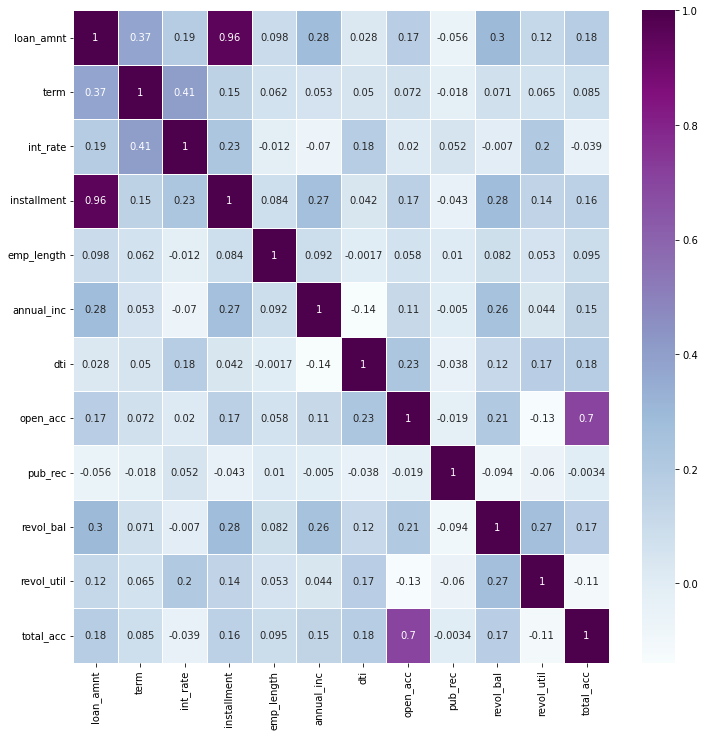

In [506]:
plt.figure(figsize=(12,12))
sns.heatmap(lc_loan.corr() ,cmap ='BuPu',cbar=True,annot=True,linewidths=.5)
plt.show()

#### Insight
- ```loan_amnt``` and ```installment``` is in highly correlated  (directly proportional) \
     It is true, because installment is the monthly payment for the loan 
- ```total_acc``` and ```open_acc```is in correlated (directly proportional) \
     It is true, because open_acc is part of total_acc which is the number of total credit lines in the borrower's credit file

### Distribution 
Next, we can check the distribution on all numerical features to get a quick summary of the shape and the variation of values in each feature

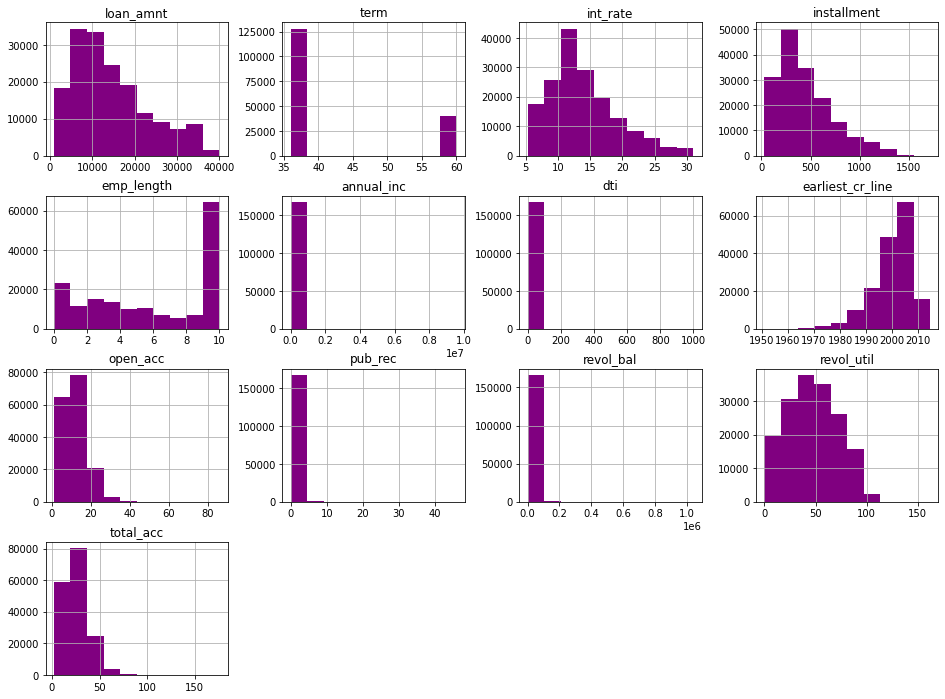

In [507]:
lc_loan.hist(bins=10 ,figsize=(16,12), color='Purple')
plt.show()


In [508]:
lc_loan.describe()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,167915.000000,167915.000000,167915.000000,167915.000000,167915.000000,1.679150e+05,167881.000000,167915.000000,167915.000000,1.679150e+05,167798.000000,167915.000000
mean,14581.780216,41.727326,13.858013,449.886789,5.656606,7.979905e+04,18.603603,11.951297,0.264449,1.602588e+04,47.523195,25.593175
std,9124.695135,10.230063,5.375678,282.710896,3.889272,7.830804e+04,11.056588,5.751257,0.650121,2.348876e+04,24.794429,12.361313
min,1000.000000,36.000000,5.320000,30.120000,0.000000,0.000000e+00,-1.000000,1.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,7475.000000,36.000000,9.800000,241.785000,2.000000,4.900000e+04,11.960000,8.000000,0.000000,5.467000e+03,28.500000,17.000000
50%,12000.000000,36.000000,12.990000,376.370000,6.000000,6.800000e+04,17.940000,11.000000,0.000000,1.051500e+04,46.800000,24.000000
75%,20000.000000,36.000000,16.990000,605.070000,10.000000,9.500000e+04,24.650000,15.000000,0.000000,1.907650e+04,66.100000,32.000000
max,40000.000000,60.000000,30.990000,1714.540000,10.000000,9.550000e+06,999.000000,86.000000,46.000000,1.039013e+06,162.000000,176.000000


In [509]:
print("Unique term:  ",lc_loan['term'].nunique())
print("Uniques dti:  ",lc_loan['dti'].nunique())
print("Unique annual_inc:  ",lc_loan['annual_inc'].nunique())
print("Unique pub_rec:  ",lc_loan['pub_rec'].nunique())
print("Unique revol_bal:  ",lc_loan['revol_bal'].nunique())

Unique term:   2
Uniques dti:   4920
Unique annual_inc:   13127
Unique pub_rec:   19
Unique revol_bal:   43588


#### Insight
- ```annual_inc```, ```dti```and ```revol_bal``` should be a continuous values however we found that their values aggregate in one point. We can inspect them later (possibly because outliers)
- ```loan_amnt```, ```int_rate```, ```installment```, ```open_acc```, ```total_acc```, and ```revol_util``` have tendency to the left side (Right-Skewed)
- ```emp_length```, and ```earliest_cr_line``` have tendency to the right side (Left-Skewed)

### Categorical Observation

In [510]:
lc_loan[categoric_col].nunique()

term                    2
grade                   7
sub_grade              35
emp_title           52533
emp_length             11
home_ownership          5
pymnt_plan              1
purpose                12
title                  12
zip_code              892
addr_state             50
earliest_cr_line      653
application_type        2
dtype: int64

In [511]:
lc_loan[categoric_col].dtypes

term                         int64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                   int64
home_ownership              object
pymnt_plan                  object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
earliest_cr_line    datetime64[ns]
application_type            object
dtype: object

#### Insight
- ```emp_title```, ```zip_code```, ```addr_state```, ```earliest_cr_line``` have huge unique values hence we only choose some top values for next exploration

### Loan Status Distribution

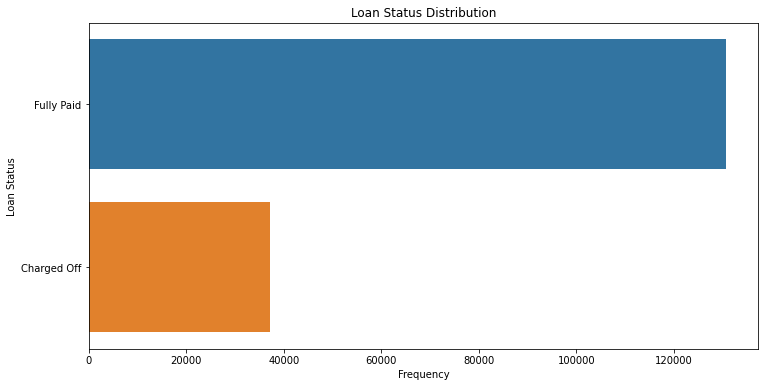

In [512]:
plt.figure(figsize=(12,6))
ax = sns.countplot(y=lc_loan['loan_status'], order = lc_loan['loan_status'].value_counts().index)
ax = plt.xlabel('Frequency')
ax = plt.ylabel('Loan Status')
ax = plt.title('Loan Status Distribution')

#### Insight
The dataset is highly imbalanced where the number of fully paid loan is much higher than the charged off loan. (This may not seem to be a huge problem now but it will surely lead to performance degradation when it comes to modeling.)

### Exploration Group by Loan Status
Explore relationship between features and loan status

#### On DTI

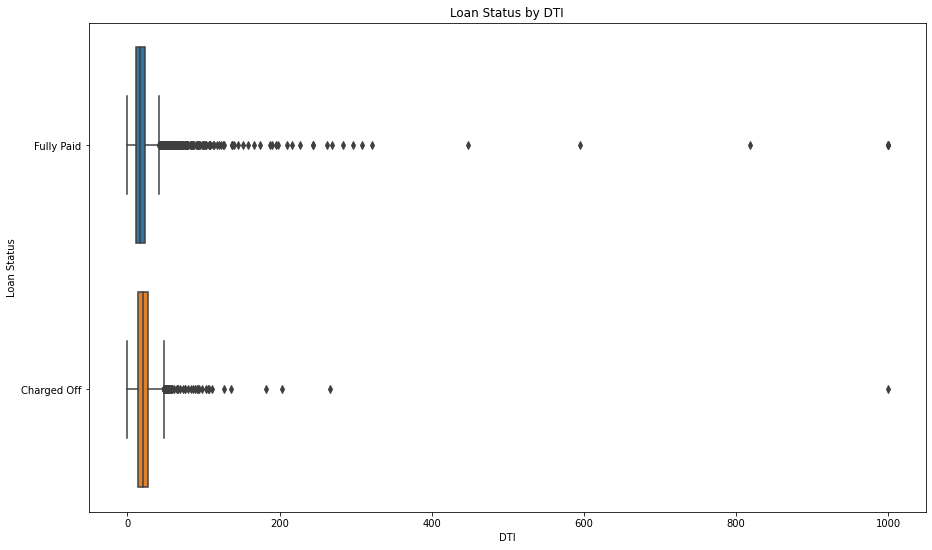

In [513]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(y="loan_status", x="dti", data=lc_loan)
ax = plt.xlabel('DTI')
ax = plt.ylabel('Loan Status')
ax = plt.title('Loan Status by DTI')

In [514]:
dti = lc_loan[lc_loan.dti <= 100].hvplot.hist(
    y='dti', by='loan_status', bins=25, alpha=0.3, width=350, height=400,
    title="Loan Status by DTI (<= 100)", xlabel='DTI', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

dti

:NdOverlay   [loan_status]
   :Histogram   [dti]   (dti_count)

In [515]:
print((lc_loan[lc_loan.dti <= 100].shape[0] / lc_loan.shape[0]) * 100)
print((lc_loan[lc_loan.dti > 100 ].shape[0] / lc_loan.shape[0]) * 100)

99.94521037429652
0.0345412857695858


In [516]:
lc_loan.loc[lc_loan.dti > 100, 'loan_status'].value_counts()

Fully Paid     48
Charged Off    10
Name: loan_status, dtype: int64

In [517]:
lc_loan.loc[lc_loan.dti <= 100, 'loan_status'].value_counts()

Fully Paid     130641
Charged Off     37182
Name: loan_status, dtype: int64

In [518]:
lc_loan[lc_loan['dti']> 100].head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type
40936,8500,36,17.09,303.43,D,D1,NaN,0,RENT,8832.0,...,238xx,VA,174.86,2000-06-01,8,0,17842.0,97.5,24,Joint App
41090,12000,60,25.82,358.01,E,E4,NaN,0,RENT,15600.0,...,305xx,GA,126.38,2005-07-01,17,1,8259.0,40.9,21,Joint App
57495,15600,36,7.97,488.64,A,A5,sales associate,0,MORTGAGE,7000.0,...,443xx,OH,137.22,2000-03-01,8,0,32435.0,66.2,12,Joint App
59663,35000,36,18.99,1282.79,D,D3,NaN,0,MORTGAGE,1000.0,...,863xx,AZ,999.00,2004-08-01,8,1,11662.0,85.8,24,Joint App
74508,22400,60,15.99,544.61,C,C5,NaN,0,MORTGAGE,14500.0,...,458xx,OH,187.15,2008-12-01,9,0,141238.0,11.8,16,Joint App


In [519]:
lc_loan[lc_loan['dti']> 100]['application_type'].value_counts()

Joint App    58
Name: application_type, dtype: int64

##### Insight

- Only 0.03 % data having DTI > 100 %
- It is found that DTI greater than 100 % is application with type of "Joint App" (not because an outlier). It does make sense since Joint App means multiple borrowers in one applicant


#### On Interest Rate and Annual Income

In [520]:
int_rate = lc_loan.hvplot.hist(
    y='int_rate', by='loan_status', alpha=0.3, width=350, height=400,
    title="Loan Status by Interest Rate", xlabel='Interest Rate', ylabel='Loans Counts', 
    legend='top'
)

annual_inc = lc_loan.hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status by Annual Income", xlabel='Annual Income', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

int_rate + annual_inc

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [int_rate]   (int_rate_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [annual_inc]   (annual_inc_count)

In [521]:
lc_loan['annual_inc'].hvplot(kind='box').opts(invert_axes=True)

:BoxWhisker   (annual_inc)

In [522]:
lc_loan[lc_loan.annual_inc <= 95000].hvplot.hist(
    y='annual_inc', by='loan_status', bins=50, alpha=0.3, width=500, height=400,
    title="Loan Status by Annual Income (<= 95000/Year)", 
    xlabel='Annual Income', ylabel='Loans Counts', legend='top'
).opts(xrotation=45)

:NdOverlay   [loan_status]
   :Histogram   [annual_inc]   (annual_inc_count)

In [523]:
print((lc_loan[lc_loan.annual_inc <= 95000].shape[0] / lc_loan.shape[0]) * 100)
print((lc_loan[lc_loan.annual_inc > 95000].shape[0] / lc_loan.shape[0]) * 100)

75.49057558883959
24.509424411160406


In [524]:
lc_loan.loc[lc_loan.annual_inc <= 95000, 'loan_status'].value_counts()

Fully Paid     96902
Charged Off    29858
Name: loan_status, dtype: int64

In [525]:
lc_loan.loc[lc_loan.annual_inc > 95000, 'loan_status'].value_counts()

Fully Paid     33816
Charged Off     7339
Name: loan_status, dtype: int64

In [526]:
lc_loan[(lc_loan['annual_inc']> 95000) & (lc_loan['loan_status'] == 'Charged Off') ]['emp_title'].value_counts()[:10]

Owner               192
Manager             148
Director            101
President           101
Sales                92
Registered Nurse     72
owner                64
Teacher              61
RN                   59
Project Manager      58
Name: emp_title, dtype: int64

##### Insight
- It seems that loans with 11 % interest rate are more likely to be unpaid
- There are 25 % borrowers have an annual income more than 95000 (75th percentile). Mostly are Owner, Manager and Director

#### On Loan Amount and Installment

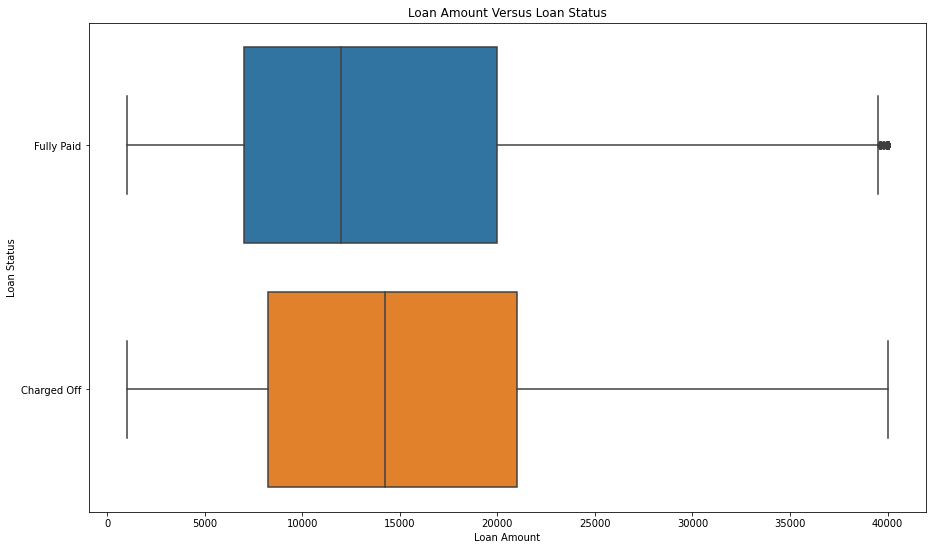

In [527]:
plt.figure(figsize=(15,9))
ax = sns.boxplot(y="loan_status", x="loan_amnt", data=lc_loan)
ax = plt.xlabel('Loan Amount')
ax = plt.ylabel('Loan Status')
ax = plt.title('Loan Amount Versus Loan Status')

In [528]:
loan_amnt = lc_loan.hvplot.hist(
    y='loan_amnt', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Amount Distribution", xlabel='Loan Amount', ylabel='Loans Counts', 
    legend='top'
)


installment = lc_loan.hvplot.hist(
    y='installment', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Installment Distribution", xlabel='Installment', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

loan_amnt + installment

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)

##### Insight
- There is no significant different between the distribution of fully paid and charged off
- Both distribution (loan amount and installment) is slightly skewed to the right

#### On Derogatory Public Records
- Derogatory Public records may include records of Civil judgments, tax liens and bankruptcies

In [529]:
pub_rec = lc_loan.hvplot.hist(
    y='pub_rec', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status by Pub Rec", xlabel='Pub Record Numbers', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)
pub_rec

:NdOverlay   [loan_status]
   :Histogram   [pub_rec]   (pub_rec_count)

In [530]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

In [531]:
lc_loan['pub_rec'] = lc_loan.pub_rec.apply(pub_rec)
print((lc_loan[lc_loan.pub_rec == 1].shape[0] / lc_loan.shape[0]) * 100)

20.583628621624037


In [532]:
pd.crosstab(lc_loan['loan_status'], lc_loan['pub_rec'], margins = True).sort_values(['loan_status'],ascending=True)

pub_rec,0,1,All
loan_status,,,
All,133352,34563,167915
Charged Off,29093,8104,37197
Fully Paid,104259,26459,130718


<AxesSubplot:xlabel='pub_rec', ylabel='count'>

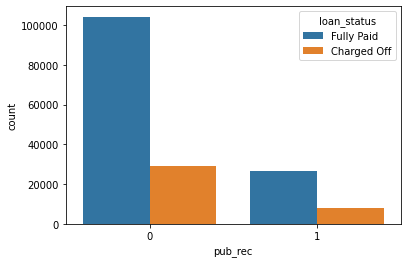

In [533]:
sns.countplot(x='pub_rec', data=lc_loan, hue='loan_status')

##### Insight
- 21% Borrowers have derogatory records

#### On Revolving Balance and Revolving line utilization rate
- revol_bal: Total credit revolving balance
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit

In [534]:
lc_loan['revol_bal'].describe()

count    1.679150e+05
mean     1.602588e+04
std      2.348876e+04
min      0.000000e+00
25%      5.467000e+03
50%      1.051500e+04
75%      1.907650e+04
max      1.039013e+06
Name: revol_bal, dtype: float64

In [535]:
lc_loan['revol_bal'].hvplot(kind='box',title='Loan Status by Revolving Balance').opts(invert_axes=True)

:BoxWhisker   (revol_bal)

In [536]:
revol_bal_fil = lc_loan[lc_loan.revol_bal <= 11000].hvplot.hist(
    y='revol_bal', by='loan_status', bins=50, alpha=0.3, width=350, height=400,
    title="Loan Status by Revolving Balance (<=11000)", xlabel='Revolving Balance ', ylabel='Loans Counts', 
    legend='top'
).opts(xrotation=45)

title="Loan Status by Revolving line utilization rate (<120)"

revol_util = lc_loan.hvplot.hist(
    y='revol_util', by='loan_status', bins=50, width=350, height=400, 
    title=title, xlabel='Revolving line utilization rate', ylabel='Count', 
    shared_axes=False, alpha=0.4, legend='top'
)


revol_bal_fil + revol_util

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [revol_bal]   (revol_bal_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [revol_util]   (revol_util_count)

##### Insight


#### On Open Account and Total Account

In [606]:
title="Loan Status by The number of open credit lines"

open_acc = lc_loan.hvplot.hist(
    y='open_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The number of open credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

title="Loan Status by The total number of credit lines"

total_acc = lc_loan.hvplot.hist(
    y='total_acc', by='loan_status', bins=50, width=300, height=350, 
    title=title, xlabel='The total number of credit lines', ylabel='Count', 
    alpha=0.4, legend='top'
)

open_acc + total_acc

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [open_acc]   (open_acc_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [total_acc]   (total_acc_count)

In [538]:
print((lc_loan[lc_loan.open_acc > 40].shape[0] / lc_loan.shape[0]) * 100)

0.12804097311139565


In [539]:
print((lc_loan[lc_loan.total_acc > 80].shape[0] / lc_loan.shape[0]) * 100)

0.16555995593008369


##### Insight
- Only 0.12% borrower have more than 40 open credit lines.
- Only 0.16% borrower have more than 80 credit line in the borrower credit file.

#### On Loan Purpose and Title

Text(0.5, 0, 'Frequency')

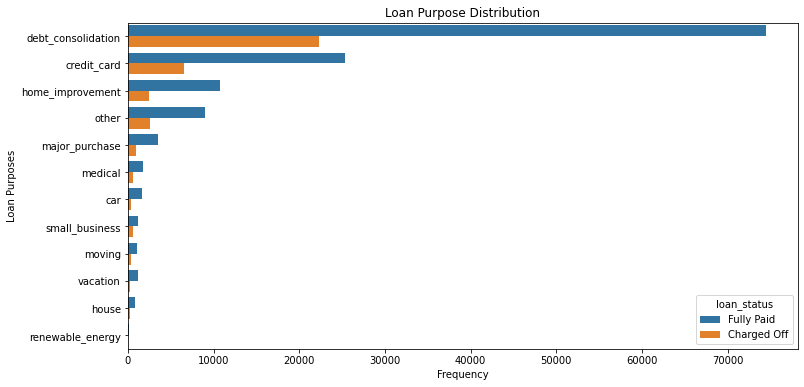

In [540]:
plt.figure(figsize=(12,6))
sns.countplot(y=lc_loan['purpose'],order = lc_loan['purpose'].value_counts().index, hue=lc_loan['loan_status'])
plt.title('Loan Purpose Distribution')
plt.ylabel('Loan Purposes')
plt.xlabel('Frequency')

In [541]:
pd.crosstab(lc_loan['purpose'], lc_loan['loan_status'], margins = True).sort_values(['purpose'],ascending=True)

loan_status,Charged Off,Fully Paid,All
purpose,,,
All,37197,130718,167915
car,314,1653,1967
credit_card,6484,25320,31804
debt_consolidation,22351,74434,96785
home_improvement,2414,10714,13128
house,214,873,1087
major_purchase,891,3463,4354
medical,616,1715,2331
moving,390,1104,1494


In [542]:
print("Empty Title Counts: ",lc_loan.title.isna().sum())
print("Empty Purpose Counts: ",lc_loan.purpose.isna().sum())
lc_loan.title.value_counts()[:10]

Empty Title Counts:  7838
Empty Purpose Counts:  0


Debt consolidation         91864
Credit card refinancing    30099
Home improvement           12660
Other                      11332
Major purchase              4219
Medical expenses            2251
Car financing               1913
Business                    1718
Moving and relocation       1452
Vacation                    1393
Name: title, dtype: int64

##### Insight
- Most of loan purpose is for "debt_consolidation", followed by "credit card" and "home improvement"
- ```purpose```, and ```title``` basically have same values

#### On Grade

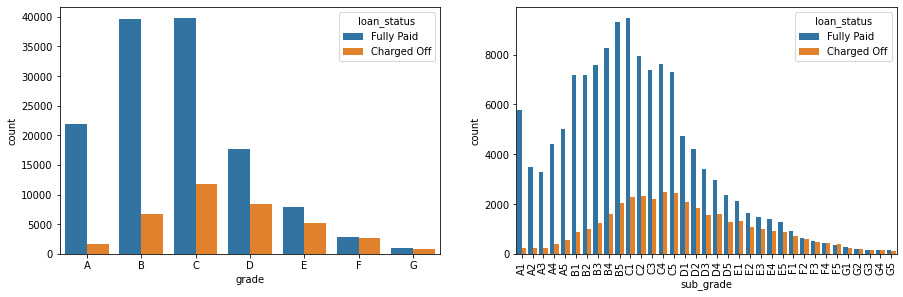

In [543]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(lc_loan.grade.unique().tolist())
sns.countplot(x='grade', data=lc_loan, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(lc_loan.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=lc_loan, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

##### Insight
It looks like C and D subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

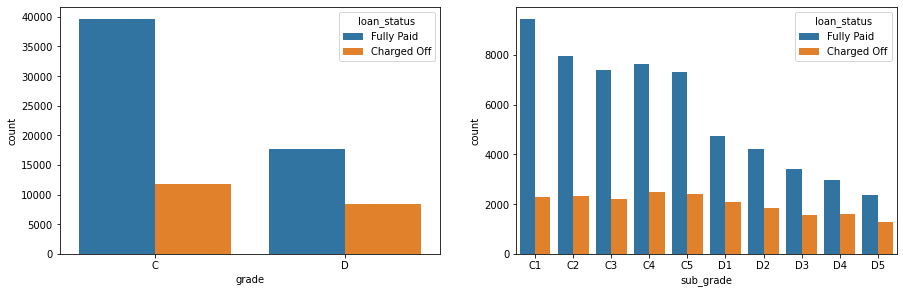

In [544]:
df = lc_loan[(lc_loan.grade == 'C') | (lc_loan.grade == 'D')]

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)

#### On home ownership, default status, and grade

In [545]:
pd.crosstab(lc_loan['home_ownership'], [lc_loan['loan_status'], lc_loan['grade']])

loan_status    Charged Off                                    Fully Paid  \
grade                    A     B     C     D     E     F    G          A   
home_ownership                                                             
ANY                      0     4     4     2     3     3    0         12   
MORTGAGE               860  2923  4762  3341  2091   962  313      13569   
NONE                     0     0     0     0     0     0    0          0   
OWN                    234   876  1480  1011   653   317  106       2689   
RENT                   567  2973  5480  4013  2495  1301  423       5710   

loan_status                                          
grade               B      C     D     E     F    G  
home_ownership                                       
ANY                19     27    13     3     1    2  
MORTGAGE        20955  20425  8818  3989  1443  470  
NONE                0      1     0     0     0    0  
OWN              4805   4900  2301  1036   359  126  
RENT            13757  14360  6581  2916  1071  360

##### Insight
It looks like home ownership with ```rent``` in grade ```C``` doesn't get paid back that often

#### On Term

In [546]:
pd.crosstab(lc_loan['term'], [lc_loan['loan_status']])

loan_status,Charged Off,Fully Paid
term,,
36,25178,102666
60,12019,28052


<AxesSubplot:xlabel='term', ylabel='count'>

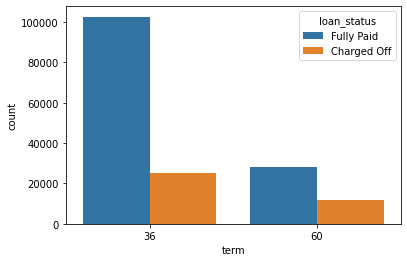

In [547]:
term = sorted(lc_loan.term.unique().tolist())
sns.countplot(x='term', data=lc_loan, hue='loan_status', order=term)

#### On Employment Title and Employment Length

In [548]:
print(lc_loan.emp_title.isna().sum())
print("number of unique employment title: ",lc_loan.emp_title.nunique())

10839
number of unique employment title:  52533


In [549]:
lc_loan['emp_title'].value_counts()[:20]

Manager               3245
Teacher               3069
Owner                 1634
Supervisor            1625
Driver                1479
Registered Nurse      1331
Sales                 1320
RN                    1280
Project Manager        956
Director               829
Office Manager         806
General Manager        798
Engineer               671
Operations Manager     591
President              586
Vice President         551
owner                  550
manager                546
Accountant             539
Sales Manager          501
Name: emp_title, dtype: int64

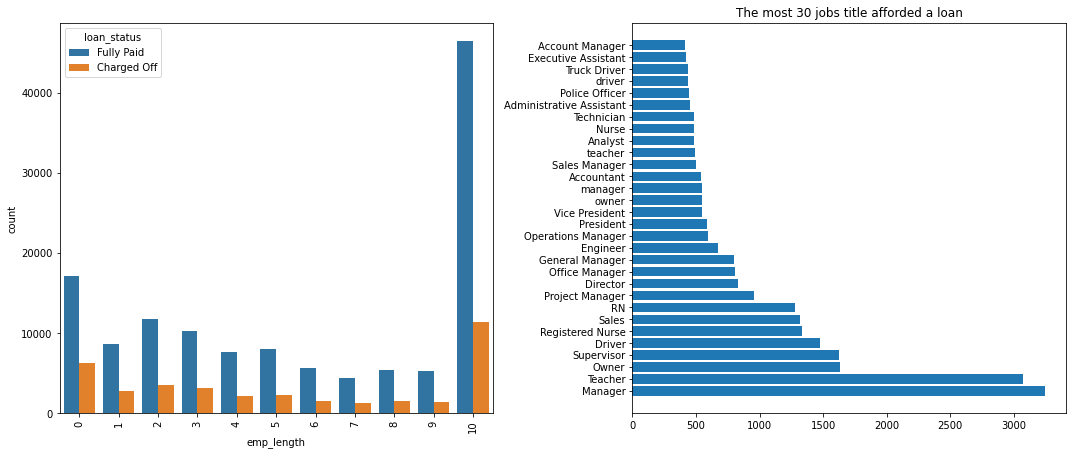

In [550]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)

g = sns.countplot(x='emp_length', data=lc_loan, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(lc_loan.emp_title.value_counts()[:30].index, lc_loan.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

In [551]:
for year in lc_loan.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{lc_loan[lc_loan.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

6 years in this position:
Fully Paid     0.787249
Charged Off    0.212751
Name: loan_status, dtype: float64
2 years in this position:
Fully Paid     0.771065
Charged Off    0.228935
Name: loan_status, dtype: float64
7 years in this position:
Fully Paid     0.782508
Charged Off    0.217492
Name: loan_status, dtype: float64
10 years in this position:
Fully Paid     0.803332
Charged Off    0.196668
Name: loan_status, dtype: float64
3 years in this position:
Fully Paid     0.765712
Charged Off    0.234288
Name: loan_status, dtype: float64
0 years in this position:
Fully Paid     0.732665
Charged Off    0.267335
Name: loan_status, dtype: float64
9 years in this position:
Fully Paid     0.788148
Charged Off    0.211852
Name: loan_status, dtype: float64
4 years in this position:
Fully Paid     0.779063
Charged Off    0.220937
Name: loan_status, dtype: float64
1 years in this position:
Fully Paid     0.759569
Charged Off    0.240431
Name: loan_status, dtype: float64
5 years in this position:
F

##### Insight
- Based on figure above, employment with +- 10 years experience has more tendency to be default
- ```emp_title``` (Employment title) has 52533 unique values, most of them are Manager

#### On Zip Code and Address State

In [552]:
print("Unique Zip Code: ",lc_loan.zip_code.nunique())
print("Unique Address State: ",lc_loan.addr_state.nunique())

Unique Zip Code:  892
Unique Address State:  50


#### On Credit Line Opened Date
The month the borrower's earliest reported credit line was opened

In [553]:
lc_loan['earliest_cr_line'].value_counts().head()

2004-09-01    1349
2004-08-01    1300
2003-08-01    1300
2003-09-01    1289
2005-09-01    1263
Name: earliest_cr_line, dtype: int64

In [554]:
fully_paid = lc_loan.loc[lc_loan['loan_status']=='Fully Paid', 'earliest_cr_line'].hvplot.hist(bins=35) 
charged_off = lc_loan.loc[lc_loan['loan_status']=='Charged Off', 'earliest_cr_line'].hvplot.hist(bins=35)

earliest_cr_line = (fully_paid * charged_off).opts(
    title="Loan Status by earliest_cr_line", xlabel='earliest_cr_line', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

earliest_cr_line

:Overlay
   .Histogram.I  :Histogram   [earliest_cr_line]   (earliest_cr_line_count)
   .Histogram.II :Histogram   [earliest_cr_line]   (earliest_cr_line_count)

#### On Payment Plan and Application Type
- ```pymnt_plan```: Indicates if a payment plan has been put in place for the loan

In [555]:
lc_loan['pymnt_plan'].value_counts()

n    167915
Name: pymnt_plan, dtype: int64

In [556]:
fully_paid = lc_loan.loc[lc_loan['loan_status']=='Fully Paid', 'application_type'].value_counts().hvplot.bar() 
charged_off = lc_loan.loc[lc_loan['loan_status']=='Charged Off', 'application_type'].value_counts().hvplot.bar()

(fully_paid * charged_off).opts(
    title="Loan Status by Application Type", xlabel="Application Type", ylabel='Count',
    width=400, height=400, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Application_type.I  :Bars   [index]   (application_type)
   .Bars.Application_type.II :Bars   [index]   (application_type)

In [557]:
print('Percentage of Joint App', (lc_loan[lc_loan.application_type == 'Joint App'].shape[0] / lc_loan.shape[0]) * 100)

Percentage of Joint App 2.1213113777804247


##### Insight
- ```pymnt_plan``` only has 1 unique value
- Only 2% of data is A Join App application type 

### Summary for the exploration

- The distributions of loan is ...
- The correlation between the variables are ...
- The characteristics of good and bad borrowers are ..
- The influence factors of the loan repayment and default rate are ...

## 7. Preparation for Modelling
- Remove unnecessary or repetitive features
- Remove or fill any missing data
- Handle outliers 
- Feature Engineering
- Check for duplicates columns and features

In [651]:
# Copy dataset for modelling
loan_model = lc_loan.copy()
# loan_model['loan_status']
# # format loan_status to numeric
loan_model['loan_status'] = loan_model.loan_status.map({'Fully Paid':1, 'Charged Off':0})
loan_model['loan_status'].head()

8     1
10    1
24    1
42    1
91    1
Name: loan_status, dtype: int64

### Remove unnecessary or repetitive features
Based on our exploration:
- ```title``` and ```purpose``` has same values. We can drop ```title``` since ```purpose``` has no null values
- ```emp_title```, ```zip_code``` has to many unique values. We can drop this feature
- ```sub_grade``` is the sub of ```grade```. We can drop ```sub_grade```

In [652]:
# Drop unnecessary or repetitive features
loan_model = loan_model.drop(columns=['title', 'emp_title', 'sub_grade', 'zip_code'])
loan_model.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type
8,11575,36,7.35,359.26,A,6,OWN,153000.0,1,n,credit_card,CA,16.99,1994-07-01,20,1,8550.0,22.7,46,Individual
10,7200,36,24.85,285.70,E,2,RENT,50000.0,1,n,debt_consolidation,WA,6.07,2000-01-01,4,0,3560.0,98.9,5,Individual
24,7500,36,7.35,232.79,A,7,MORTGAGE,110000.0,1,n,debt_consolidation,TX,13.12,2013-03-01,19,0,23348.0,27.2,27,Individual
42,10000,60,16.02,243.29,C,7,RENT,51979.0,1,n,debt_consolidation,CA,10.11,2006-08-01,15,1,5733.0,20.0,21,Individual
91,14000,36,16.02,492.34,C,7,MORTGAGE,75000.0,1,n,debt_consolidation,MA,10.86,2008-05-01,4,0,2700.0,90.0,10,Individual


### Remove or fill any missing data

In [653]:
#Check percentage of missing values
for column in loan_model.columns:
    if loan_model[column].isna().sum() != 0:
        missing = loan_model[column].isna().sum()
        portion = (missing / loan_model.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'dti': number of missing values '34' ==> '0.020%'
'revol_util': number of missing values '117' ==> '0.070%'


In [654]:
loan_model.dropna(inplace=True)
print("Shape of the data frame :",loan_model.shape)

Shape of the data frame : (167764, 20)


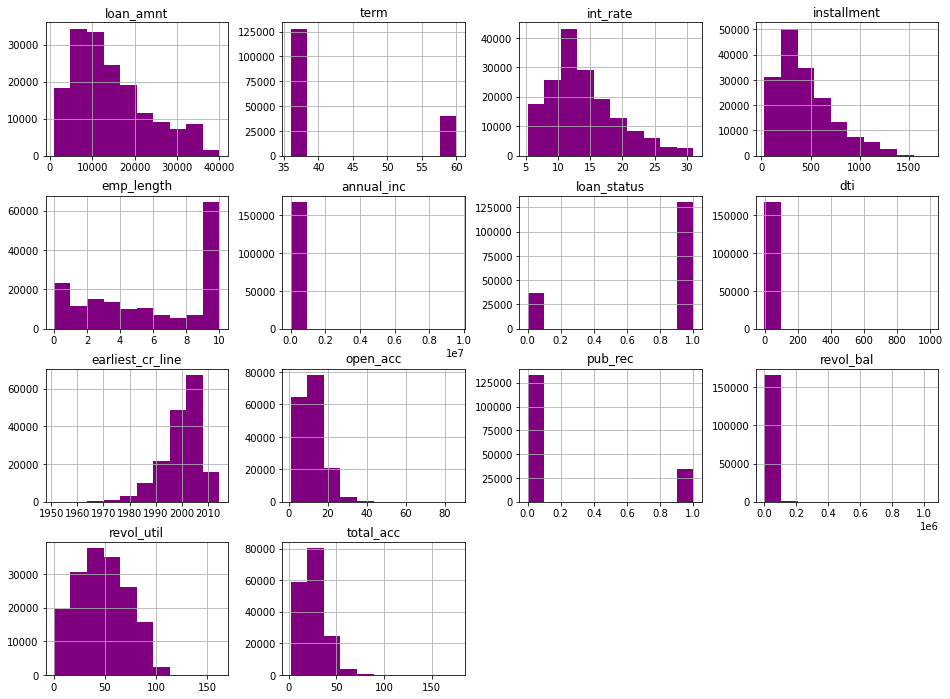

In [655]:
loan_model.hist(bins=10 ,figsize=(16,12), color='Purple')
plt.show()

### Remove outliers
In this part we only remove outliers that found to be "outliers". Based on our exploration:
- Outlier in ```dti``` (greater than 100) cause by "Joint App" application type, so we need to remove data with this type (since it is only 2% of total dataset)
    - Since the value of application type now only "Individual" then we can drop the ```application_type``` feature


In [656]:
# Removing loan data with application_type = 'Joint App'
loan_model = loan_model[loan_model['application_type'] == 'Individual']

# Drop application_type 
loan_model = loan_model.drop(columns=['application_type'])

print("Shape of the data frame :",loan_model.shape)
loan_model.head()

Shape of the data frame : (164239, 19)


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc
8,11575,36,7.35,359.26,A,6,OWN,153000.0,1,n,credit_card,CA,16.99,1994-07-01,20,1,8550.0,22.7,46
10,7200,36,24.85,285.70,E,2,RENT,50000.0,1,n,debt_consolidation,WA,6.07,2000-01-01,4,0,3560.0,98.9,5
24,7500,36,7.35,232.79,A,7,MORTGAGE,110000.0,1,n,debt_consolidation,TX,13.12,2013-03-01,19,0,23348.0,27.2,27
42,10000,60,16.02,243.29,C,7,RENT,51979.0,1,n,debt_consolidation,CA,10.11,2006-08-01,15,1,5733.0,20.0,21
91,14000,36,16.02,492.34,C,7,MORTGAGE,75000.0,1,n,debt_consolidation,MA,10.86,2008-05-01,4,0,2700.0,90.0,10


### Feature Engineer
Before modelling we need to adjust the features being fed to machine learning model

- ```earliest_cr_line```appears to be a historical time stamp feature. Extract the year from this feature using a .apply() function, then convert it to a numeric feature.

In [657]:
loan_model['earliest_cr_line'] = loan_model.earliest_cr_line.dt.year

In [658]:
loan_model.earliest_cr_line.nunique()

63

In [659]:
print([column for column in loan_model.columns if loan_model[column].dtype == object])

['grade', 'home_ownership', 'pymnt_plan', 'purpose', 'addr_state']


In [661]:
dummies = ['grade', 'home_ownership', 'pymnt_plan', 'purpose', 'addr_state']
loan_model = pd.get_dummies(loan_model, columns=dummies, drop_first=True)

### Check for duplicates columns and features

In [565]:
# print("Data shape 1 : ",loan_model.shape)

# # Remove duplicate Features
# loan_model = loan_model.T.drop_duplicates()
# loan_model = loan_model.T

# # Remove Duplicate Rows
# loan_model.drop_duplicates(inplace=True)

# print("Data shape 2: ",loan_model.shape)

## 8. Modelling
- Split Data Set
- Remove Outliers
- Normalize data
- Rebalance data \
  Based on our investigation, our data is imblance hence it can lead in inaccurate / biased classifications of the final output. to handle this, we need toby over-sampling, under-sampling, or smote 
- Models Building
- Cross validation for the algorithm
- Evaluate the performance using measurement such  as confusion matrix

### Split Data Set

#### Train Test Split

In [662]:
w_p = loan_model.loan_status.value_counts()[0] / loan_model.shape[0]
w_n = loan_model.loan_status.value_counts()[1] / loan_model.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")

Weight of positive values 0.2223284359987579
Weight of negative values 0.777671564001242


In [663]:
train, test = train_test_split(loan_model, test_size=0.2, random_state=42)

print(train.shape)
print(test.shape)

(131391, 83)
(32848, 83)


### Handle Outliers
In this part, we handle outlier on train data

- Outlier for ```annual_inc``` is expected to be greater than 95000
- Outlier for ```open_acc``` is expected to be greater than 40
- Outlier for ```total_acc``` is expected to be greater than 80

In [664]:
# Removing loan data with annual inc greater than 95000
train = train[train['annual_inc'] <= 95000]

# Removing loan data with open_acc greater than 40
train = train[train['open_acc'] <= 40]

# Removing loan data with total_acc greater than 80
train = train[train['total_acc'] <= 80]
print(train.shape)

(98681, 83)


### Normalize Data
The input numerical attributes have very different scales. To get all attributes to have the same scale we use min-maxScaling

In [665]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [667]:
X_train.dtypes

loan_amnt                       int64
term                            int64
int_rate                      float64
installment                   float64
emp_length                      int64
annual_inc                    float64
dti                           float64
earliest_cr_line                int64
open_acc                        int64
pub_rec                         int64
revol_bal                     float64
revol_util                    float64
total_acc                       int64
grade_B                         uint8
grade_C                         uint8
grade_D                         uint8
grade_E                         uint8
grade_F                         uint8
grade_G                         uint8
home_ownership_MORTGAGE         uint8
home_ownership_OWN              uint8
home_ownership_RENT             uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_home_improvement        uint8
purpose_house                   uint8
purpose_majo

In [668]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building
We start our modelling from simple to complex one
- Logistic Regression
- Decision Tree
- XGBoostClassifier
- Support Vector Classifier (SCV)
- RandomForestClassifier

#### Logistic Regression

In [669]:
lr = LogisticRegression()

In [670]:
#model.fit artinya akan mempeljari pola pola X_train dan y_train yg diberikan
lr.fit(X_train, y_train) 
# menguji X_test, analogi ini spt kita ujian di beri soal X_test, nah hasil ujian itu y_pred
y_pred= lr.predict(X_test)

In [671]:
# buat data frame 
# analogi nya y_test itu adalah kunci jawaban
result = pd.DataFrame(list(zip(y_pred, y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [672]:
# cek berapa prediksi yang benar dg akurasi skor
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7814478811495372

In [673]:
# selain akurasi score, kita bisa ukur dg confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

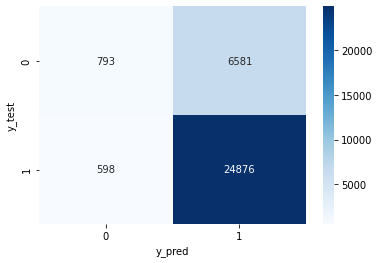

In [674]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show() # hasil yg diagonal merupakan hasil yang benar

In [676]:
sensitivity = 793/(793+6581)
sensitivity

0.10754000542446433

# Final Notes

Throughout this notebook, we have done some data cleaning , analysed, to modelling the problem

# References
- [Lending Club Loan 💰 Defaulters 🏃‍♂ Prediction](https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction#%F0%9F%94%84-Data-PreProcessing)
- [EDA Case Study - Lending Club](https://www.kaggle.com/code/ritavale/eda-case-study-lending-club)
- [A Note on Lending Club and Institutional Investment](https://sirallen.name/blo9g/note-on-lending-club/)
- [Lending Club EDA - An Intuitive Approach](https://www.kaggle.com/code/mhlee2907/lending-club-eda-an-intuitive-approach/notebook)
- [Lending-Club-Case-Study](https://www.kaggle.com/code/abhishek14398/lending-club-case-study/notebook)
- [Loan Classification](https://www.kaggle.com/code/ahmedbasem/loan-classification) \
    consist of exploration, data preparation (imbalance case), modelling
- [Perbedaan Boxplot, Scatter Plot dan Violin Plot](https://medium.com/@shelvyyy/perbedaan-boxplot-scatter-plot-dan-violin-plot-49eef92a2bd2)
- [Definisi Debt to Income Ratio?](https://www.simulasikredit.com/definisi-debt-to-income-ratio/)